# ALZHEIMER EARLY DETECTION
## 1. INTRODUCTION AND STATE OF THE ART

![AD](ADMRI.jpg)

Alzheimer's disease (AD) is a progressive neurologic disorder which causes the brain to atrophy and brain cells to die. This disease is the main common cause (around 60-70%) of dementia, which leads to a continuous decline in thinking and behavioral, making the person to lose their own autonomy.

The cause of AD is still poorly understood, there are many genetic and environmental risk factors associated with the disease, i.e. clinical depression, high blood pressure or head injury. In terms of genetic causes, the strongest genetic risk is from an allele of APOE. 

AD is usually diagnosed based on the patient's medical history, history from relatives and behavioral observations. But also techniques as computed tomography (CT), magnetic resonance imaging (MRI), single-photon emission computed tomography (SPECT) or positron emission tomography (PET) can help to diagnose this disease and exclude other cerebral pathology.

The Open Access Series of Imaging Studies (OASIS) is a project which creates neuroimaging datasets of the brain freely available to the scientific community. The main aim of this project is to help scientists to keep discovering new things in basic and clinical neuroscience. That is why we are going to use one of their datasets for the aim of this thesis, which is to predict the Clinical Dementia Rating (CDR) of a patient, based on machine learning algorithms. 


## 2. DATA SET AND ITS UNDERSTANDING

### SUMMARY

As it was said, OASIS project generated some MRI data sets related to AD. For this project, a longitudinal sample of MRI data from older adults with and without AD is picked. This dataset gathers data from 150 individuals aged 60 to 96 years, where each of them was scanned on two or more visits. From the data colletted we have:

* 64 patients had very mild to moderate AD at their initial visit. This assesment was done using the Clinical Dementia Rating (CDR).
* 14 patients were evaluated as "Nondemented" at their initial visit and after diagnosed with AD in a subsequent scan.
* 72 patients were evaluated as "Nondemented" throughout each MRI session.
* Everyone is right-handed.
* From the 150 subjects, 62 are men and 88 are women.
* All data were acquired on the same scanner using identical procedures.

### COLUMN DESCRIPTION

|COL |Description|
|:-----|:----|
|EDUC |Years of Education |
|SES |Socioeconomic Status |
|MMSE |Mini Mental State Examination |
|CDR |Clinical Dementia Rating |
|eTIV |Estimated Total Intracranial Volume (cm3) |
|nWBV |Normalized Whole Brain Volume |
|ASF |Atlas Scaling Factor |

#### SES: Socioeconomic Status
Socioeconomic status as assessed by the Hollingshead Index of Social Position and classified into categories from 1 (highest status) to 5 (lowest status).

#### MMSE: Mini Mental State Examination
Mini-Mental State Examination score (range is from 0 = worst to 30 = best).

#### CDR: Clinical Dementia Rating
Clinical Dementia Rating (0 = no dementia, 0.5 = very mild AD, 1 = mild AD, 2 = moderate AD).

#### ASF: Atlas Scaling Factor
Computed scaling factor that transforms native-space brain and skull to the atlas target (i.e., the determinant of the transform matrix).

#### nWBV: Normalized Whole-Brain Volume 
Normalized whole-brain volume, expressed as a percent of all voxels in the atlas-masked image that are labeled as gray or white matter by the automated tissue segmentation process.

## 3. EXPLORATORY DATA ANALYSIS


Once we have a general picture of the data set, we are going to explore our data. Our main goal is to find out how the CDR, and thus, the diagnosis of the patient, is related to the other variables. It is really important to get some visual information, check the correlation between our variables, and, in short, understand the nature of our data in order to choose the right variables to predict our target. 

In [1]:
#Import all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Read the dataset
df = pd.read_csv('C:/Users/rrolr/OneDrive/Documentos/Máster/TFM/oasis_longitudinal.csv')
#First look to the dataset
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [3]:
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [4]:
#Drop useless columns
df = df.drop(['MRI ID', 'Hand', 'Visit', 'Subject ID'], axis=1)

In order to plot the distribution of Non-Demented/Demented people in men and women, we apply some changes to the column Group (Demented=1 and Non-Demented=0) and M/F (Men=0 and Women=1).

In [5]:
#Replacement Coverted column to Demented
df['Group'] = df['Group'].replace(['Converted'], ['Demented'])
#Assign Demented to 1 and Non Demented to 0
df['Group'] = df['Group'].replace(['Demented', 'Nondemented'], [1,0])
#Assign M to 0 and F to 1
df['M/F'] = df['M/F'].replace(['M','F'], [0,1])

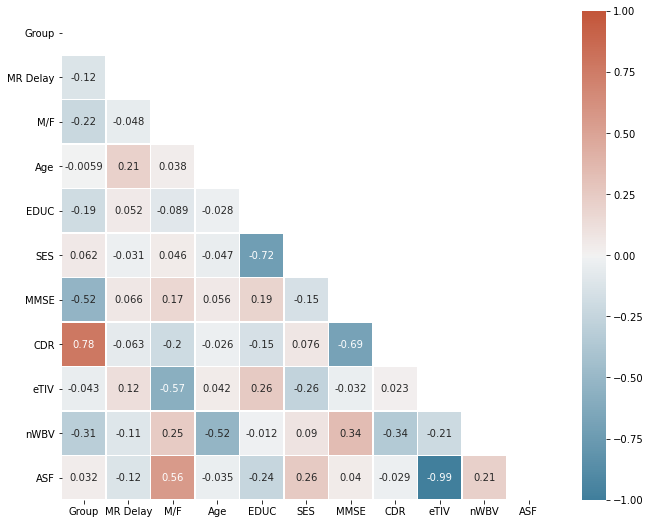

In [6]:
#Get Correlation Matrix 
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
f, ax = plt.subplots(figsize = (11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap = True)
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 1, vmin = -1, center = 0,
            square = True, linewidths = .5, annot = True, cbar_kws = {"shrink": 1})

We can observe in the correlation matrix how the CDR and the Group are highly correlated, as well as eTIV and ASF, for obvious reasons. Apart from that, it is noteworthy to see how the MMSE has a big influence in the CDR. The higher the MMSE is, the less developed is the dementia in the subject. 

The Normalized Whole-Brain Volume (nWBV) and the gender (M/F) are less but also correlated to the CDR. Higher dementia ratings are associated to smaller brain volumes, and it seems that men are more likely to suffer of AD.

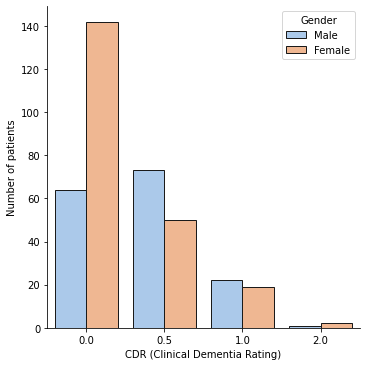

In [7]:
#Plot CDR and Gender
gender_plot = sns.catplot(x = "CDR", hue = "M/F", kind = "count", data = df, palette = "pastel", edgecolor = "0.1", legend = False)
plt.legend(title = 'Gender', loc = 'upper right', labels = ['Male', 'Female'])
gender_plot.set(xlabel = 'CDR (Clinical Dementia Rating)', ylabel = 'Number of patients')
plt.show(gender_plot)

Effectively, it looks like women are less likely to have Alzheimer than men.

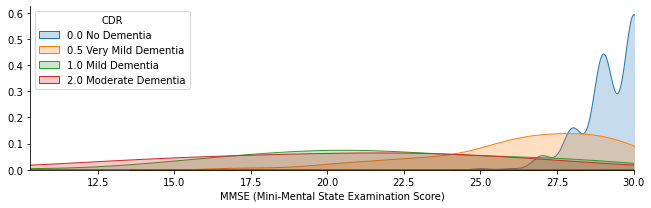

In [8]:
#Plot MMSE and CDR
MMSE_plot = sns.FacetGrid(df,hue = "CDR", aspect = 3)
MMSE_plot.map(sns.kdeplot,'MMSE',shade = True)
MMSE_plot.set(xlim = (0, df['MMSE'].max()))
plt.xlim(10.30)
MMSE_plot.set(xlabel = 'MMSE (Mini-Mental State Examination Score)')
plt.legend(title = 'CDR', loc = 'upper left', labels = ['0.0 No Dementia', '0.5 Very Mild Dementia', '1.0 Mild Dementia', '2.0 Moderate Dementia'])

All subjects with no dementia, had a higher MMSE than patients with some kind of dementia. 

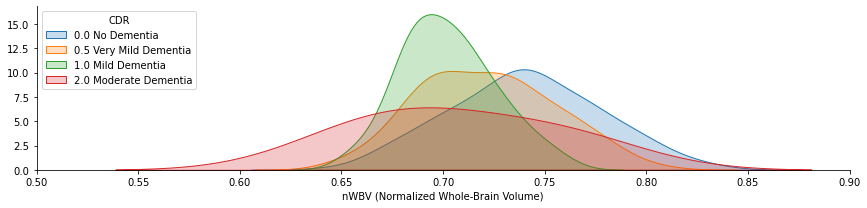

In [9]:
#Plot nWBV and CDR
nWBV_plot = sns.FacetGrid(df,hue = "CDR", aspect = 4)
nWBV_plot.map(sns.kdeplot,'nWBV',shade = True)
nWBV_plot.set(xlim = (0, df['nWBV'].max()))
plt.xlim(0.5,0.9)
nWBV_plot.set(xlabel = 'nWBV (Normalized Whole-Brain Volume)')
plt.legend(title = 'CDR', loc = 'upper left', labels = ['0.0 No Dementia', '0.5 Very Mild Dementia', '1.0 Mild Dementia', '2.0 Moderate Dementia'])

We see in this graph how the curve of no demented subjects are moved to the right, where the brain volume is bigger. Moreover, we observe how there are many cases with mild dementia located to the left of the plot with a smaller brain volume.

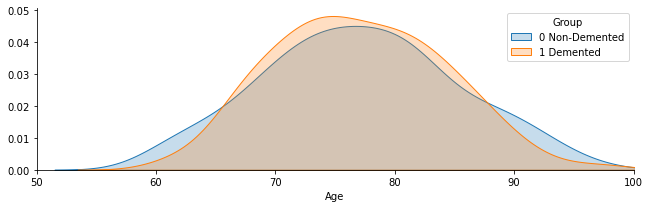

In [10]:
#Plot Age and Group
age_plot = sns.FacetGrid(df,hue = "Group", aspect = 3)
age_plot.map(sns.kdeplot,'Age',shade = True)
age_plot.set(xlim = (0, df['Age'].max()))
plt.xlim(50,100)
plt.legend(title = 'Group', loc = 'upper right', labels = ['0 Non-Demented', '1 Demented'])

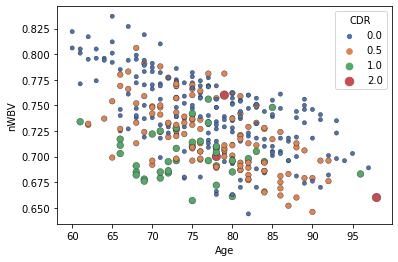

In [11]:
#Plot Age, nWBV and CDR
sns.scatterplot(data = df, x = "Age", y = "nWBV", hue = 'CDR', palette = "deep", size = 'CDR', legend = 'full', edgecolor = "0.1")

A really interesting scatter plot here. Most of the cases of no dementia, are located higher than the cases with CDR=0.5, 1.0 and 2.0, which means bigger brain volume. Also we can observe a descending tendency of the brain volumen with age.

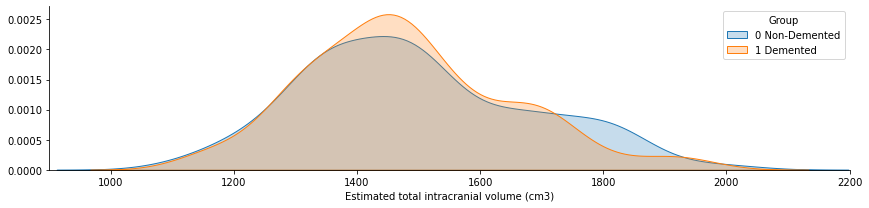

In [12]:
#Plot eTIV and Group
eTIV_plot = sns.FacetGrid(df, hue = "Group", aspect = 4)
eTIV_plot.map(sns.kdeplot,'eTIV',shade = True)
eTIV_plot.set(xlim = (0, df['eTIV'].max()))
plt.xlim(900,2200)
plt.legend(title = 'Group', loc = 'upper right', labels = ['0 Non-Demented', '1 Demented'])
eTIV_plot.set(xlabel = 'Estimated total intracranial volume (cm3)')


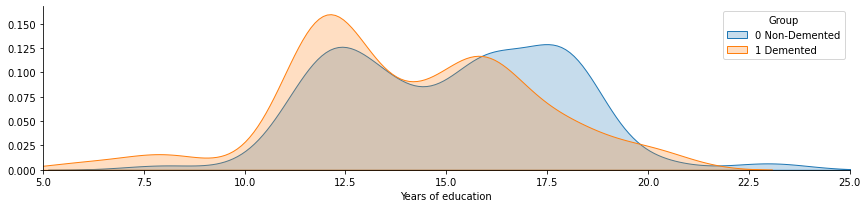

In [13]:
#Plot eTIV and Group
EDUC_plot = sns.FacetGrid(df, hue = "Group", aspect = 4)
EDUC_plot.map(sns.kdeplot,'EDUC',shade = True)
EDUC_plot.set(xlim = (0, df['EDUC'].max()))
plt.xlim(5,25)
plt.legend(title = 'Group', loc = 'upper right', labels = ['0 Non-Demented', '1 Demented'])
EDUC_plot.set(xlabel = 'Years of education')


From all these plots we can deduce some conclusions:
* Women are more likely to have AD than men.
* The Mini-Mental State Examination Score (MMSE) has an evident impact on the dementia detection. Lower it is, more likely to have it.
* The older the subject is, smaller brain volume they have, and also more chance to be diagnosed with dementia.
* Education can also have an impact on the diagnosis. People who has trained and exercise their brain for longer, can reduce the chance of having AD.

## 4. DATA PREPROCESSING AND SPLITTING THE DATA SET

Before we start to build our machine learning models, it is important to perform a preprocessing in our data set. Firstly, we are goint to check if there are any missing values.

In [14]:
#Check how many missing values are in the dataset
pd.isnull(df).sum()

Group        0
MR Delay     0
M/F          0
Age          0
EDUC         0
SES         19
MMSE         2
CDR          0
eTIV         0
nWBV         0
ASF          0
dtype: int64

There are 19 missing values in the SES column and 2 missing values in the MMSE column. We decided to replace these missing values with the median. In the case of the SES column, we grouped the EDUC Column and calculated the median for each group. We performed in the same way with the MMSE, since it seems CDR and MMSE are highly correlated.

In [15]:
#Group the median of SES (Socioconomic status) by level of education (EDUC)
df.groupby(['EDUC'])['SES'].median()

EDUC
6     4.0
8     5.0
11    4.0
12    3.0
13    2.0
14    3.0
15    2.0
16    2.0
17    1.0
18    2.0
20    1.0
23    1.0
Name: SES, dtype: float64

In [16]:
#Group the median of MMSE (Mini-Mental State Examination score) by CDR
df.groupby(['CDR'])['MMSE'].median()

CDR
0.0    29.0
0.5    27.0
1.0    21.0
2.0    21.0
Name: MMSE, dtype: float64

In [17]:
#Fill missing values with median 
df["SES"].fillna(df.groupby("EDUC")["SES"].transform("median"), inplace = True)
df["MMSE"].fillna(df.groupby("CDR")["MMSE"].transform("median"), inplace = True)

In [18]:
#Check there are no missing values
pd.isnull(df).sum()

Group       0
MR Delay    0
M/F         0
Age         0
EDUC        0
SES         0
MMSE        0
CDR         0
eTIV        0
nWBV        0
ASF         0
dtype: int64

In [19]:
#Transform CDR column to string type
df['CDR'] = df['CDR'].astype('str')

#Import libraries for preprocessing and splitting the dataset
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split



Now we are going to split our data set using the sklearn libraries, enabling the stratify feature. A stratified train-test split makes the data set to be splitted into train and test sets in a way that preserves the same proportions of examples in each class as observed in the original dataset. We are going to scale our data set as well, since some machine learning models perform better with scaled data sets. 

In [20]:
#CDR will be the target variable
df_target = df['CDR'].values

#Define features
df_data =  df[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']].values

#Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(df_data, df_target, stratify = df_target, random_state = 30)

#Scale the dataset
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)

X_train_scaled = (X_train - mean_on_train)/std_on_train
X_test_scaled = (X_test - mean_on_train)/std_on_train

## 5. MODELS 

As we said in the first part of this project, the target variable we are going to predict is the Clinical Dementia Rating. Since it is a categorical variable we are going to use multiclass classification algorithms. In order to measure the accuracy of our model, the confusion matrix is going to be the method used. In it, each row of the matrix represents the instances in an actual class while each column represents the instances in a predicted class. 

We are going to explain the basis of the perfomance measures for a multiclass classification problem. Let's start with the precision, which measures what proportion of predicted positives is truly positive. This means that *precision* is TP/(TP+FP), where TP are the True Positives and FP the False Positives.

In the other hand, we have the *recall*, which measures the proportion of predicted positives which are truly positive. Then, *recall* is TP/(TP+FN), where FN are the False Negatives.

Another interesting parameter is *accuracy*. Basically, it measures the total TP+TN correctly classified, so the general formula is (TP+TN)/(TP+TN+FP+FN).

![Confusion Matrix](Matrix1.png)

Last, *F1-Score* was created to summarize *precision* and *recall* in only one parameter. It is computed using a *mean* but not an *arithmetic mean*, but an *harmonic mean*. Its formula is *F1-score = 2 × (precision × recall)/(precision + recall)*, giving more weight to lower scores.

In a multiclass classification problem, all these parameters explained for each class are summarized in some other parameters: *macro average*, *weighted average* and *micro average* or *accuracy*. For our problem, since the CDR 2.0 Class is unbalanced in number of cases, we should only take into account the *weighted average* or the *accuracy*. The first one weights the *F1-Score* of each class by the number of sample from that class. The second one measures the proportion of correctly classified samples out of all the samples.

Since we are trying to predict if a subject has AD or not, we have to pay attention to the *recall*. We don't want to have false negatives where we predict the subject has no AD, when actually they have it. *Precision* is also important for this case, since misdiagnosing a subject with AD when actually they have no AD it is not desirable neither. That's why the *weighted average F1-Score* seems a good parameter for our project.

The goal of this chapter is to compare some classifiers algorithms and check which one has the best performance. Additionally, we will perform a parameter tuning for each model, keeping the best one through the use of loops.

For all the algorithms we will be using k-Fold Cross-Validation, where we split our data into k different subsets (or folds). We use k-1 subsets to train our data and leave the last subset (or the last fold) as test data. We then average the model against each of the folds and then finalize our model. After that we test it against the test set. In our case, we will have three data sets. Previously we splitted our data in train and test sub sets, and now the Cross-Validation method is splitting our train set in multiple sub sets, using one of them as a validation set, and the rest of them for training the algorithm.

![k-Fold Cross Validation](CV.png)


### 5.1 DECISION TREE

For the Decision Tree algorithm, we are going to perform it going through all possible depths of the tree. The maximum value is the number of features choosen, so for this case the maximum is 9.

Validation accuracy with best parameter is 0.7418181818181818
Test accuracy is 0.7021276595744681
Best max depth is 2
              precision    recall  f1-score   support

         0.0       0.74      0.92      0.82        52
         0.5       0.59      0.42      0.49        31
         1.0       0.71      0.50      0.59        10
         2.0       0.00      0.00      0.00         1

    accuracy                           0.70        94
   macro avg       0.51      0.46      0.47        94
weighted avg       0.68      0.70      0.68        94



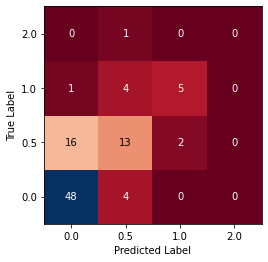

In [21]:
#Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import mglearn 
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score


#Create empty list for appending accuracy results
results = []

#Initialize best_score variable
best_score = 0

#Number of kfolds for the cross-validation
kfolds = 5

#Decision Tree algorithm where different maxdepth values are tested
for maxdepth in range(1,10):
    
        tree = DecisionTreeClassifier(max_depth = maxdepth, random_state = 30)
        scores = cross_val_score(tree, X_train, Y_train, cv = kfolds, scoring = 'accuracy')
        score = np.mean(scores)
        
        #Check if the test score is better than current best score and variables update
        if score > best_score:
            best_score = score
            best_parameter = maxdepth
            
SelectedDTModel = DecisionTreeClassifier(max_depth = best_parameter).fit(X_train, Y_train)
test_score = SelectedDTModel.score(X_test, Y_test)
PredictedOutput = SelectedDTModel.predict(X_test)
            
print("Validation accuracy with best parameter is", best_score)
print("Test accuracy is", test_score)
print("Best max depth is", best_parameter)

#Create and plot the confusion matrix
scores_images = mglearn.tools.heatmap(confusion_matrix(Y_test, PredictedOutput), xlabel = "Predicted Label",
                                      ylabel = "True Label", xticklabels = ["0.0", "0.5", "1.0","2.0"], 
                                       yticklabels = ["0.0", "0.5", "1.0","2.0"], cmap = "RdBu", fmt = "%d")

#Print of results report and get weighted f1-score
report = print(classification_report(Y_test, PredictedOutput))
f1 = f1_score(Y_test, PredictedOutput, average='weighted')


#Append the results to the list
model = 'Decision Tree'
results.append([model, best_score, test_score, f1])


We observe the algorithm had some difficulties to predict correctly subjects with a CDR of 0.5 and 1.0. About the rest of categories, we can say the accuracy is good so far. We check visually the decision tree to see how the decision tree takes the decision. Afterwards, we calculate the importance of each feature for the decision tree to predict the CDR with a feature importance function.

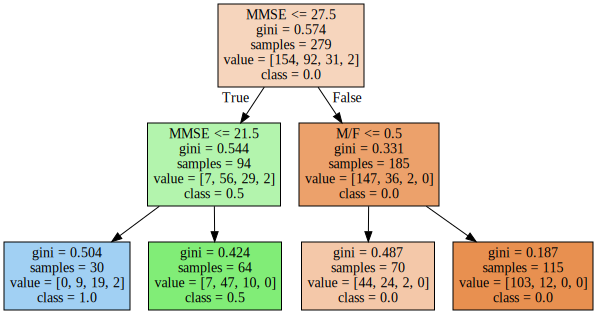

In [22]:
#Import necessary libraries for plotting the decision tree
from sklearn.tree import export_graphviz
import graphviz

#Generate and save decision tree plot
export_graphviz(SelectedDTModel, out_file = "tree.dot", class_names = ["0.0", "0.5", "1.0", "2.0"],
                feature_names = ('M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF'), filled = True)
with open("tree.dot") as f:
    dot_graph = f.read()

#Display the decision tree
display(graphviz.Source(dot_graph))

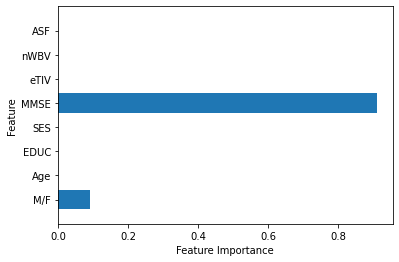

In [23]:
#Function that plots the importance of each feature for the algorithm
def plot_feature_importances(model):
    n_features = df_data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align = 'center')
    plt.yticks(np.arange(n_features), ('M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF'))
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(SelectedDTModel)

### 5.2 RANDOM FOREST

A Random Forest is essentially a collection of decision trees, where each tree is different from the others. The main idea behind this algorithm, is to build many trees which overtfits in a slightly different way, and then averaging the results of all of them, so we can get the "most accurate" part of each tree. We choose the best score in the test data set trying with different number of trees, features and maximum depth.

Validation accuracy with best parameter is 0.7596753246753247
test accuracy is 0.7021276595744681
Best max depth is 2
Best number of trees is 16
Best number of estimators is 8
              precision    recall  f1-score   support

         0.0       0.74      0.92      0.82        52
         0.5       0.59      0.42      0.49        31
         1.0       0.71      0.50      0.59        10
         2.0       0.00      0.00      0.00         1

    accuracy                           0.70        94
   macro avg       0.51      0.46      0.47        94
weighted avg       0.68      0.70      0.68        94



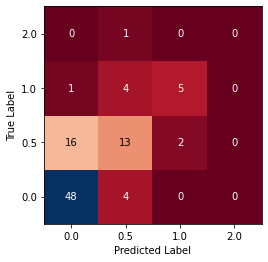

In [24]:
#Import necessary library
from sklearn.ensemble import RandomForestClassifier

#Initialize best_score variable
best_score = 0 

#Number of kfolds for the cross-validation
kfolds = 5

#Random Forest algorithm where different maxdepth, features and trees values are tested
for trees in range(1,20):
    for features in range(1,9):
        for maxdepth in range(1,9):
    
            forest = RandomForestClassifier(max_depth = maxdepth, n_estimators = trees, max_features = features, random_state = 30)
            scores = cross_val_score(forest, X_train, Y_train, cv = kfolds, scoring = 'accuracy')
            score = np.mean(scores)
            
            #Check if the test score is better than current best score and variables update
            if score > best_score:
                best_score = score
                best_depth = maxdepth
                best_trees = trees
                best_features = features
                 
SelectedRFModel = RandomForestClassifier(max_depth=best_depth, n_estimators = best_trees,
                                         max_features = best_features).fit(X_train, Y_train)
test_score = SelectedRFModel.score(X_test, Y_test)
PredictedOutputRF = SelectedRFModel.predict(X_test)

print("Validation accuracy with best parameter is", best_score)
print("test accuracy is", test_score)
print("Best max depth is", best_depth)
print("Best number of trees is", best_trees)
print("Best number of estimators is", best_features)

#Create and plot the confusion matrix
scores_images = mglearn.tools.heatmap(confusion_matrix(Y_test, PredictedOutputRF), xlabel = "Predicted Label",
                                      ylabel = "True Label", xticklabels = ["0.0", "0.5", "1.0","2.0"], 
                                       yticklabels = ["0.0", "0.5", "1.0","2.0"], cmap = "RdBu", fmt = "%d")

#Print of results report
print(classification_report(Y_test, PredictedOutputRF))
f1 = f1_score(Y_test, PredictedOutputRF, average='weighted')

#Append the results to the list
model = 'Random Forest'
results.append([model, best_score, test_score, f1])

Random Forest is making its job better than the Decision Tree, especially for the categories CDR=0.5 and CDR=1.0. We check the importance of each feature for the algorithm.

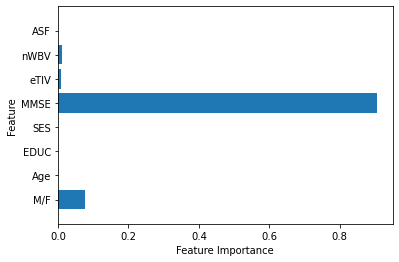

In [25]:
#Plot the importance of each feature for the algorithm
plot_feature_importances(SelectedRFModel)

### 5.3 GRADIENT BOOSTED REGRESSION TREES

The Gradient Boosted Regression Tree is another ensemble method (as Random Forest is) that combines also several decision trees to create a more powerful model. The main difference with Random Forest is that the Gradient Boost works in a serial manner, so each tree tries to improve and correct the previous one, instead of creating mutiple trees and "mixing" them. For this algorithm, the learning rate parameter controls how strongly each tree tries to improve the mistakes of the previous trees. Rest of the parameters are already commented in previous chapters.

Validation accuracy with best parameter is 0.7525324675324675
Test accuracy is 0.7021276595744681
Best max depth is 1
Best estimator is 3
Best learning rate is 0.3
              precision    recall  f1-score   support

         0.0       0.74      0.92      0.82        52
         0.5       0.59      0.42      0.49        31
         1.0       0.71      0.50      0.59        10
         2.0       0.00      0.00      0.00         1

    accuracy                           0.70        94
   macro avg       0.51      0.46      0.47        94
weighted avg       0.68      0.70      0.68        94



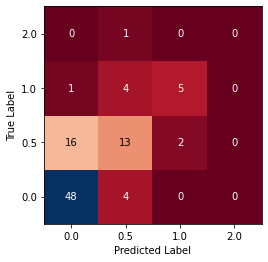

In [26]:
#Import necessary library
from sklearn.ensemble import GradientBoostingClassifier

#Initialize best_score variable
best_score = 0 

#Number of kfolds for the cross-validation
kfolds = 5

#List of learning rates that are going to be tested
learning_rate  =[0.001, 0.01, 0.1, 0.2, 0.3]

#Gradient Boosting algorithm where different maxdepth, features and estimator values are tested
for estimator in range(1,9):
    for learning in learning_rate:
        for maxdepth in range(1,9):
            
            gradient = GradientBoostingClassifier(max_depth = maxdepth, n_estimators = estimator, learning_rate = learning, random_state=30)
            scores = cross_val_score(gradient, X_train, Y_train, cv = kfolds, scoring = 'accuracy')
            score = np.mean(scores)
            
            #Check if the test score is better than current best score and variables update
            if score > best_score:
                best_score = score
                best_depth = maxdepth
                best_estimator = estimator
                best_learning_rate = learning            
                
SelectedGBCModel = GradientBoostingClassifier(max_depth = best_depth, n_estimators = best_estimator,
                                              learning_rate = best_learning_rate).fit(X_train, Y_train)
test_score = SelectedGBCModel.score(X_test, Y_test) 
PredictedOutputGBC = SelectedGBCModel.predict(X_test)

print("Validation accuracy with best parameter is", best_score)
print("Test accuracy is", test_score)
print("Best max depth is", best_depth)
print("Best estimator is", best_estimator)
print("Best learning rate is", best_learning_rate)

#Create and plot the confusion matrix
scores_images = mglearn.tools.heatmap(confusion_matrix(Y_test, PredictedOutputGBC), xlabel = "Predicted Label",
                                      ylabel = "True Label", xticklabels = ["0.0", "0.5", "1.0","2.0"], 
                                       yticklabels = ["0.0", "0.5", "1.0","2.0"], cmap = "RdBu", fmt = "%d")

#Print of results report
print(classification_report(Y_test, PredictedOutputGBC))
f1 = f1_score(Y_test, PredictedOutputGBC, average='weighted')

#Append the results to the list
model = 'Gradient Boosting'
results.append([model, best_score, test_score, f1])

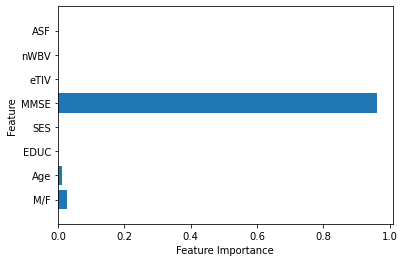

In [27]:
#Plot the importance of each feature for the algorithm
plot_feature_importances(SelectedGBCModel)

### 5.4 MULTILAYER PERCEPTRONS (NEURAL NETWORKS)

We get into deep learning. Deep learning comprises a collection of algorithmns which are very promising currently for many applications. In this project we are going to test only the method Multilayer Perceptrons, which are generalizations of linear models that perform multiple stages of processing to come a decision. 

The algorithm will be tested with differents values of alpha, which stands for the regularization applied on it. Other parameters that will be set are the hidden layers, which are the layers between input layers and out output layer, where artificial neurons take in a set of weighted inputs and produce an output through an activation function, performing non linear transformations.

Validation accuracy with best parameter is 0.7562987012987012
Test accuracy is 0.7446808510638298
Best alpha is 1
              precision    recall  f1-score   support

         0.0       0.81      0.90      0.85        52
         0.5       0.64      0.52      0.57        31
         1.0       0.64      0.70      0.67        10
         2.0       0.00      0.00      0.00         1

    accuracy                           0.74        94
   macro avg       0.52      0.53      0.52        94
weighted avg       0.73      0.74      0.73        94



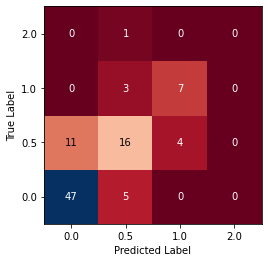

In [28]:
#Import necessary library
from sklearn.neural_network import MLPClassifier

#Initialize best_score variable
best_score = 0 

#Number of kfolds for the cross-validation
kfolds = 5

#List of alpha factors that are going to be tested
alpha_factor = [0.0001, 0.01, 0.1, 1]

#Multilayer perceptron algorithm where different alpha factors are tested
for alpha in alpha_factor:
            nlp = MLPClassifier(solver = 'lbfgs', max_iter = 10000, random_state = 30, alpha = alpha, hidden_layer_sizes = [10,10])
            scores = cross_val_score(nlp, X_train_scaled, Y_train, cv = kfolds, scoring = 'accuracy')
            score = np.mean(scores)
            
            #Check if the test score is better than current best score and variables update
            if score > best_score:
                best_score = score
                best_alpha = alpha
                
SelectedMLPModel = MLPClassifier(solver = 'lbfgs', max_iter = 10000, random_state = 30, alpha = best_alpha, 
                                 hidden_layer_sizes = [10,10]).fit(X_train_scaled, Y_train)       
test_score = SelectedMLPModel.score(X_test_scaled, Y_test)
PredictedOutputMLP = SelectedMLPModel.predict(X_test_scaled)

print("Validation accuracy with best parameter is", best_score)
print("Test accuracy is", test_score)
print("Best alpha is", best_alpha)

#Create and plot the confusion matrix
scores_images = mglearn.tools.heatmap(confusion_matrix(Y_test, PredictedOutputMLP), xlabel = "Predicted Label",
                                      ylabel = "True Label", xticklabels = ["0.0", "0.5", "1.0","2.0"], 
                                       yticklabels = ["0.0", "0.5", "1.0","2.0"], cmap = "RdBu", fmt = "%d")

#Print of results report
print(classification_report(Y_test, PredictedOutputMLP))
f1 = f1_score(Y_test, PredictedOutputMLP, average='weighted')

#Append the results to the list
model = 'Multilayer perceptron'
results.append([model, best_score, test_score, f1])

### 5.5 KERNELIZED SUPPORT VECTOR MACHINES

Kernelized support vector machines allows us to use more complex models that are not defined by hyperplanes in the input space. We will not get into much details about the maths under these models, but for this test we set the parameter c to different values. A small c parameter means a very restricted model, where each data point can only have a limited influence. The parameter gamma stands for how far the influence of a single training example reaches, with low values meaning corresponding to a far reach, and high values to a limited reach. Last, we are going to test also different types of kernel.

Validation accuracy with best parameter is 0.7413636363636364
Test accuracy is 0.7021276595744681
Best c is 1000
Best kernel is sigmoid
Best gamma is 0.01
              precision    recall  f1-score   support

         0.0       0.75      0.88      0.81        52
         0.5       0.59      0.55      0.57        31
         1.0       1.00      0.30      0.46        10
         2.0       0.00      0.00      0.00         1

    accuracy                           0.70        94
   macro avg       0.59      0.43      0.46        94
weighted avg       0.72      0.70      0.69        94



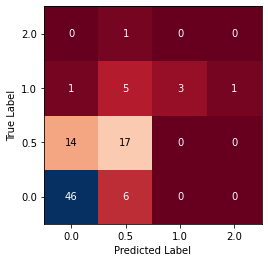

In [29]:
#Import necessary library
from sklearn.svm import SVC

#Initialize best_score variable
best_score = 0 

#Number of kfolds for the cross-validation
kfolds = 5

#List of c and gamma factors and kernels that are going to be tested
c = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
gamma = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
kernel = ['rbf', 'linear', 'poly', 'sigmoid']

#SVC algorithm where different c and gamma factors and kernels are tested
for c_param in c:
    for gamma_param in gamma:
        for kernel_param in kernel:
    
            svcmodel = SVC(kernel = kernel_param, C = c_param, gamma = gamma_param, random_state = 30)
            scores = cross_val_score(svcmodel, X_train_scaled, Y_train, cv=kfolds, scoring='accuracy')
            score = np.mean(scores)
        
            #Check if the test score is better than current best score and variables update
            if score > best_score:
                best_score = score
                best_c = c_param
                best_kernel = kernel_param
                best_gamma = gamma_param 

SelectedSVCModel = SVC(kernel = best_kernel, C = best_c, gamma = best_gamma).fit(X_train_scaled, Y_train)                
test_score = SelectedSVCModel.score(X_test_scaled, Y_test)
PredictedOutputSVC = SelectedSVCModel.predict(X_test_scaled)

print("Validation accuracy with best parameter is", best_score)
print("Test accuracy is", test_score)
print("Best c is", best_c)
print("Best kernel is", best_kernel)
print("Best gamma is", best_gamma)

#Create and plot the confusion matrix
scores_images = mglearn.tools.heatmap(confusion_matrix(Y_test, PredictedOutputSVC), xlabel = "Predicted Label",
                                      ylabel = "True Label", xticklabels = ["0.0", "0.5", "1.0", "2.0"], 
                                       yticklabels = ["0.0", "0.5", "1.0", "2.0"], cmap = "RdBu", fmt = "%d")

#Print of results report
print(classification_report(Y_test, PredictedOutputSVC))
f1 = f1_score(Y_test, PredictedOutputSVC, average='weighted')

#Append the results to the list
model = 'SVC'
results.append([model, best_score, test_score, f1])

## 6. RESULTS AND CONCLUSIONS

Let's collect all the results obtained and order by its *weighted F1-Score*.

In [30]:
#Create a dataframe with all the accuracy results collected
result = pd.DataFrame(results, columns = ['Model','Validation Score', 'Test Score', 'Weighted F1-Score'])

#Dataframe sorted by Weighted F1-Score
result.sort_values('Weighted F1-Score', ascending = False)

,Model,Validation Score,Test Score,Weighted F1-Score
3,Multilayer perceptron,0.756299,0.744681,0.732099
4,SVC,0.741364,0.702128,0.686365
0,Decision Tree,0.741818,0.702128,0.678261
1,Random Forest,0.759675,0.702128,0.678261
2,Gradient Boosting,0.752532,0.702128,0.678261


Among all the tests we have made, the Multilayer Perceptron was the one which had the best *weighted F1-Score*, with a clear difference to the rest of algorithms, which had a very similar score between them. 

In all the models we had no difficulty to predict the category with non dementia. The most tricky part for the models was to predict correctly subjects with CDR=0.5 and CDR=1. In this aspect, the Multilayer Perceptron performed slightly better than the others, making the difference to the rest of algorithms.

Having a larger and more complete data set would have meant probably to have better results. For example, we had a lack of subjects with a CDR=2.0, which made it impossible for the dataset to predict this category. That's why we think that predicting only subjects with or without AD (*Group* variable) would have been an easier target to predict. However, we can be satisfied with the results obtained, taking into account the size of the dataset and the use of machine learning algorithms in a superficial way. 

This project proves how AI can help numerous areas to predict a variable which can be of our interest, meaning for example the early detection of a disease, the fraud detection or the optimization of the training of a pilot. 

For future researches, it would be interesting to study this machine learning problem through *computer vision*. Thanks to it, we could detect patterns and be able to predict the evolution of the AD through all the MRI collected. This would not only take into account the parameters we have gathered in this project, but also some other characteristics of the brain that cannot be measured so easily.








## 7. BIBLIOGRAPHY

1. Müller A. & Guido S. (2017). *Introduction to Machine Learning with Python.* O'Reilly.
2. Marcus DS, Fotenos AF, Csernansky JG, Morris JC, Buckner RL. *Open Access Series of Imaging Studies (OASIS): Longitudinal MRI Data in Nondemented and Demented Older Adults.* Journal of cognitive neuroscience. 2010;22(12):2677-2684. doi:10.1162/jocn.2009.21407.
3. Bronshtein A. (2017, May 17). *Train/Test Split and Cross Validation in Python*. https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6
4. Bex T. (2021, Jun 6). *Comprehensive Guide to Multiclass Classification With Sklearn* https://towardsdatascience.com/comprehensive-guide-to-multiclass-classification-with-sklearn-127cc500f362
5. Shah T. (2017, Dec 6). *About Train, Validation and Test Sets in Machine Learning*. https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7
6. Shmueli B. (2019, Jul 2). *Multi-Class Metrics Made Simple, Part I: Precision and Recall*. https://towardsdatascience.com/multi-class-metrics-made-simple-part-i-precision-and-recall-9250280bddc2
7. Shmueli B. (2019, Jul 3). *Multi-Class Metrics Made Simple, Part II: the F1-score*. https://towardsdatascience.com/multi-class-metrics-made-simple-part-ii-the-f1-score-ebe8b2c2ca1
6. https://www.oasis-brains.org/#about
7. https://en.wikipedia.org/wiki/Alzheimer%27s_disease
8. https://scikit-learn.org/stable/